There are two solutions as to how to fit a a Linear Regression model: The closed form (Normal Equation), and the iterative form.


### Closed Form Solution (Unique to Linear Regression)

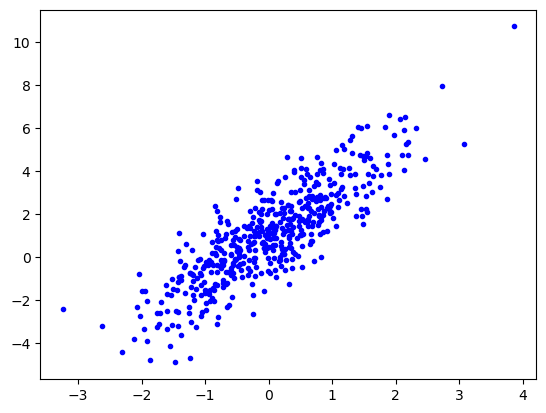

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)
X = np.random.randn(500,1)
y = 2*X + 1 + 1.2*np.random.randn(500,1)
X.shape, y.shape
plt.plot(X, y, 'b.')

Closed Form Solution: 

$w_{OLS}=(X^TX)^{-1}X^Ty$

In [6]:
def find_theta(X, y):
    
    m = X.shape[0] # Number of training examples. 
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((m,1)), axis=1)    
    # reshaping y to (m,1)
    y = y.reshape(m,1)
    
    # The Normal Equation
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    
    return theta

def predict(X, theta):
    
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    
    # preds is y_hat which is the dot product of X and theta.
    preds = np.dot(X, theta)
    
    return preds

Theta [[1.90949642]
 [1.0388102 ]]


Text(0, 0.5, 'y - target / true')

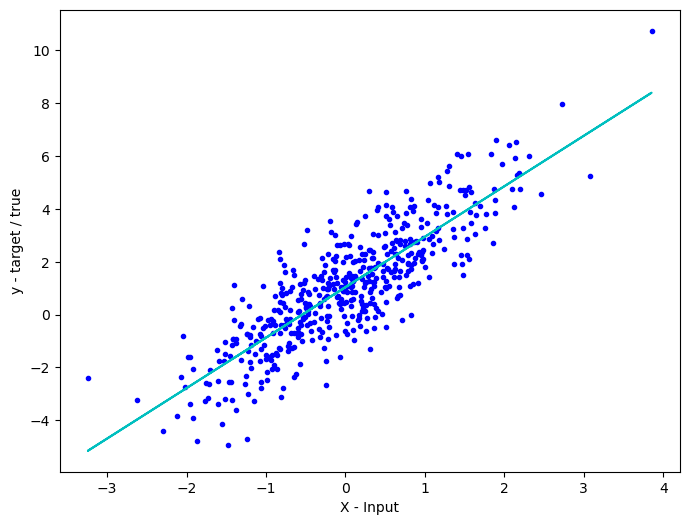

In [7]:
theta = find_theta(X, y)
print('Theta', theta)
# Getting the predictions on X using the predict function.
preds = predict(X, theta)
# Plotting the predictions.
fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'b.')
plt.plot(X, preds, 'c-')
plt.xlabel('X - Input')
plt.ylabel('y - target / true')

**Loss Function:**

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes. Also note, that the 2 is an addition to make the derivation of the function easier )

**Update Function**

Thus, the gradient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$ where $\alpha $ is the learning rate hyperparameter